In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
import numpy as np

In [6]:
from data import *

In [7]:
class dataset:
    data_path = '../data/SP500/SP_20180402_20200401.csv'

class train:
    start_date = '2019-04-01'
    end_date = '2019-08-01'

In [8]:
train_dataset = SP500_loader(dataset, train)
corrs = train_dataset.corr().fillna(1)
d = corrs.apply(lambda x: np.sqrt(2 * (1 - x)))

In [12]:
import networkx as nx
from networkx.algorithms.tree.mst import minimum_spanning_tree
from networkx.convert_matrix import to_scipy_sparse_matrix

In [10]:
G = nx.Graph()

for i in d.index:
    for j in d.columns:
        G.add_edge(i, j, weight=d.loc[i, j])

In [11]:
T = minimum_spanning_tree(G)

In [13]:
sparse = to_scipy_sparse_matrix(T)

In [14]:
sparse

<465x465 sparse matrix of type '<class 'numpy.float64'>'
	with 928 stored elements in Compressed Sparse Row format>

In [21]:
from IPython.display import SVG
from sknetwork.hierarchy import LouvainHierarchy
from sknetwork.hierarchy import cut_straight, dasgupta_score, tree_sampling_divergence
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph, svg_dendrogram

In [19]:
louvain_hierarchy = LouvainHierarchy()
dendrogram = louvain_hierarchy.fit_transform(sparse)

In [29]:
dendrogram

array([[ 10.,   1.,   0.,   2.],
       [ 41.,   0.,   0.,   2.],
       [ 48.,   3.,   0.,   2.],
       ...,
       [925., 835.,   3.,  33.],
       [926., 831.,   3.,  34.],
       [927., 827.,   3.,  35.]])

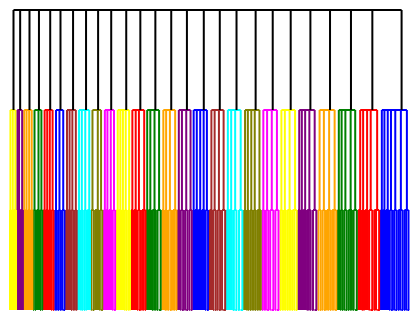

In [20]:
image = svg_dendrogram(dendrogram)
SVG(image)

In [27]:
labels = cut_straight(dendrogram)
labels

array([ 2, 12,  7, 19,  8,  0,  6,  1,  1, 19, 12,  6,  5,  3, 15, 23,  5,
        4,  1,  4, 17, 15,  0,  1,  5,  8,  3,  6,  4,  2, 19, 10,  1,  7,
        5, 25, 23,  1,  9,  6, 10,  2, 21,  0, 14, 16, 23,  0, 19, 17, 20,
        9, 23,  0, 11,  6, 16, 20, 24, 22, 24, 14, 11, 24, 21,  3,  0,  8,
       10, 14, 18,  3, 11, 11, 14,  4, 23, 23,  8,  1,  4,  9,  3, 13,  7,
        2,  0,  6,  4, 13,  9, 11,  1, 23, 24,  3, 15, 18,  2, 13,  8, 10,
        7,  1, 18, 10, 11,  9, 18, 13, 14,  2, 14,  1, 24,  7, 17, 19, 19,
       13, 10,  4, 11, 10, 25,  9,  9,  0, 14, 19,  3,  1,  0, 15, 14, 19,
        7, 12,  8,  6, 10, 15,  6,  9,  6, 16, 16,  7, 17, 17,  8, 23, 17,
       11, 16, 15, 24, 18, 16,  9, 23,  4,  7,  1,  0,  2,  2, 15,  5, 13,
        1,  3, 21, 25,  2,  1,  9, 12, 12, 18, 22,  7,  9,  0, 17, 15, 14,
       20, 12, 12,  2, 13, 21,  2, 19,  7,  5,  7, 13,  3, 16,  6,  9, 12,
        0,  9,  0,  2, 24, 25, 21, 16,  9,  4,  6,  4,  8, 13,  6, 22,  0,
        0, 13, 18, 17,  1

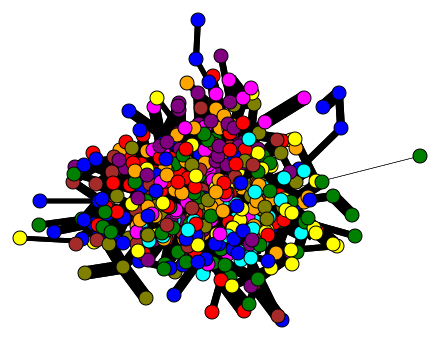

In [32]:
image = svg_graph(sparse, labels=labels)
SVG(image)

In [33]:
T.nodes

NodeView(('A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BHF', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CCI', 'CCL', 'CDNS', 'CERN', 'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 